(perioperative)=
# Perioperative Risk

*These trivial matters—diet, locality, climate, and one's mode of recreation, the whole casuistry of self-love—are inconceivably more important than, all that which has hitherto been held in high esteem!*       
-- [Why I am so clever](https://www.gutenberg.org/files/52190/52190-h/52190-h.htm), Ecce Homo 
 

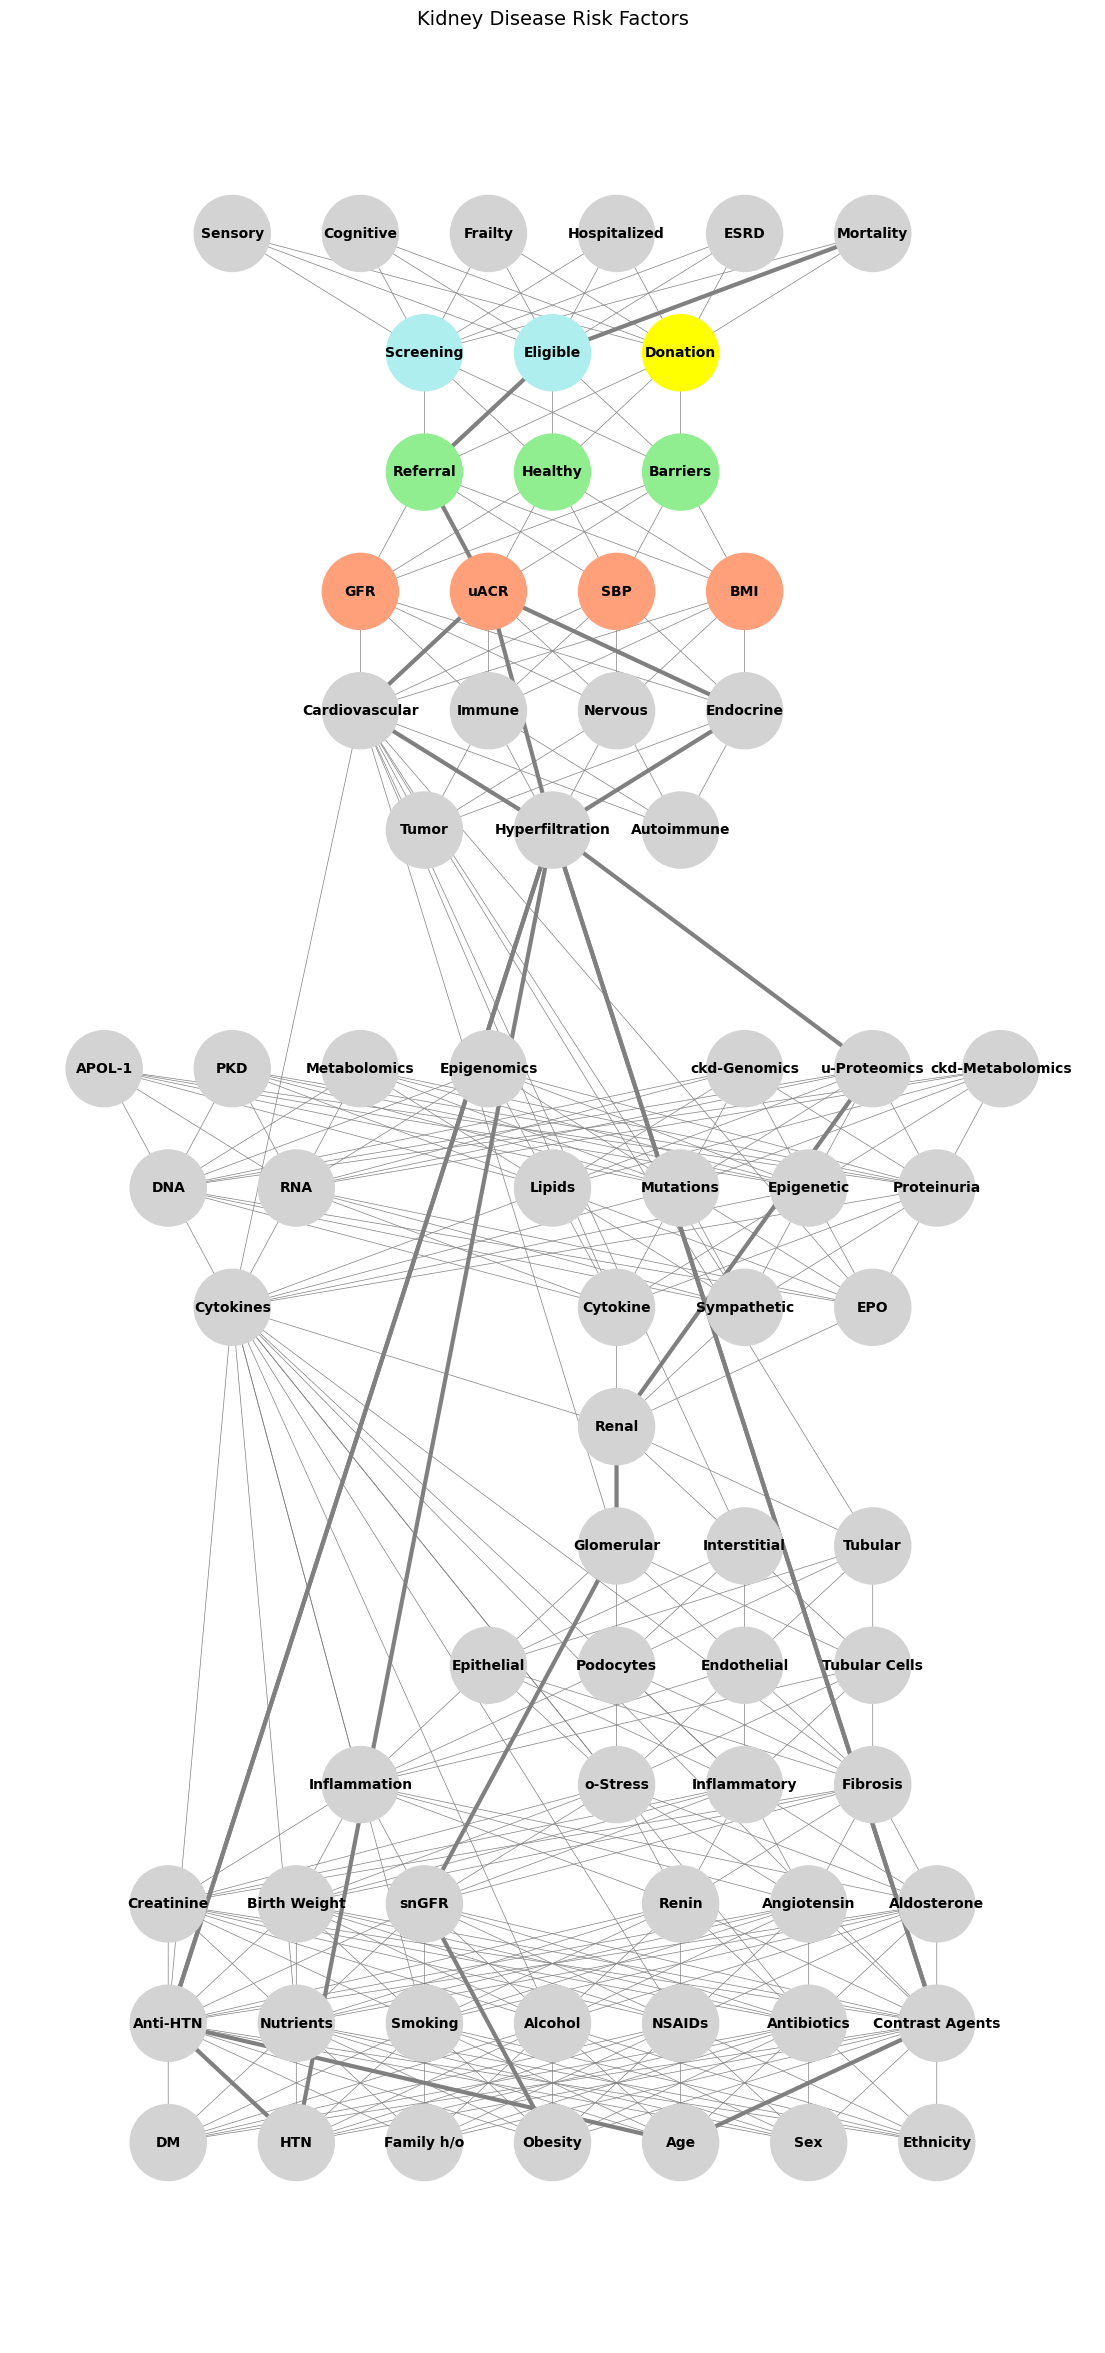

In [43]:
import networkx as nx
import matplotlib.pyplot as plt

# Define layers for the input (compression) phase
input_layers = {
    "Biology": ['DM', 'HTN', 'Family h/o', 'Obesity'],
    "Drugs and External Factors": ['Anti-HTN', 'Nutrients', 'Smoking', 'Alcohol'],
    "Ligands & Receptors": ['Creatinine', 'Birth Weight', 'snGFR', 'Cytokines'],
    "Pathways": ['o-Stress', 'Inflammation', 'Fibrosis'],
    "Cells": ['Podocytes', 'Endothelial', 'Epithelial'],
    "Tissues": ['Glomerular', 'Interstitial', 'Tubular'],
    "Systems": ['Renal', 'Cardiovascular'],
    "Immuno-Neuro-Endocrinology": ['Cytokines', 'Sympathetic', 'EPO'],
    "Molecular Biology": ['DNA', 'RNA', 'Proteinuria', 'Lipids'],
    "Omics": ['APOL-1', 'PKD', 'Metabolomics', 'Epigenomics', 'u-Proteomics'],
    "Quantum": []
}

# Define layers for the output (decompression) phase
output_layers = {
    # "Molecular Outputs": ['Electron Transfer', 'Molecular Stability', 'Reaction Dynamics'],
    # "Cellular Behavior": ['ATP Production', 'Membrane Potential', 'DNA Repair', 'Protein Synthesis'],
    "Tissue-Level Dynamics": ['Tumor', 'Hyperfiltration', 'Autoimmune'],
    "Organ Systems": ['Cardiovascular', 'Immune', 'Nervous', 'Endocrine'],
    "Physiological States": ['GFR', 'uACR', 'SBP', 'BMI'],
    "Behavioral and Psychological Outcomes": ['Referral', 'Healthy', 'Barriers'],
    "Sociological and Environmental Interactions": ['Screening', 'Eligible', 'Donation'],
    "Functional Health Outcomes": ['Sensory', 'Cognitive', 'Frailty', 'Hospitalized', 'ESRD', 'Mortality']
}

# Update nodes with kidney disease risk factors
kidney_disease_risk_factors = {
    "Biology": ['Age', 'Sex', 'Ethnicity'],
    "Drugs and External Factors": ['NSAIDs', 'Antibiotics', 'Contrast Agents'],
    "Ligands & Receptors": ['Renin', 'Angiotensin', 'Aldosterone'],
    "Pathways": ['o-Stress', 'Inflammatory', 'Fibrosis'],
    "Cells": ['Podocytes', 'Endothelial', 'Tubular Cells'],
    "Tissues": ['Glomerular', 'Interstitial', 'Tubular'],
    "Systems": ['Renal', 'Cardiovascular'],
    "Immuno-Neuro-Endocrinology": ['Cytokine', 'Sympathetic', 'EPO'],
    "Molecular Biology": ['Mutations', 'Epigenetic', 'Proteinuria'],
    "Omics": ['ckd-Genomics', 'u-Proteomics', 'ckd-Metabolomics'],
    "Quantum": []  # No known direct risk factors at this level
}

# Merge input and output layers
full_layers = {**input_layers, **output_layers}
for layer_name, risk_factors in kidney_disease_risk_factors.items():
    if layer_name in full_layers:
        full_layers[layer_name].extend(risk_factors)

# Initialize the graph
G_full_biology = nx.DiGraph()

# Add nodes for each layer
for layer_name, nodes in full_layers.items():
    G_full_biology.add_nodes_from(nodes, layer=layer_name)

# Connect layers sequentially
layer_names = list(full_layers.keys())
for i in range(len(layer_names) - 1):
    source_layer = full_layers[layer_names[i]]
    target_layer = full_layers[layer_names[i + 1]]
    for source_node in source_layer:
        for target_node in target_layer:
            G_full_biology.add_edge(source_node, target_node)

# Define node positions for visualization (inverted layout)
pos_full_biology = {}
layer_spacing = 2  # Space between layers
node_spacing = 1.5  # Space between nodes within a layer

for i, (layer_name, nodes) in enumerate(full_layers.items()):
    y = i * layer_spacing - (len(layer_names) - 1) * layer_spacing / 2  # Inverted vertical alignment
    for j, node in enumerate(nodes):
        x = j * node_spacing - (len(nodes) - 1) * node_spacing / 2  # Center nodes horizontally within layer
        pos_full_biology[node] = (x, y)

# Define specific colors for the Stress Dynamics pathway
highlighted_layers = {
    "Physiological States": "lightsalmon",
    "Behavioral and Psychological Outcomes": "lightgreen",
    "Sociological and Environmental Interactions": "paleturquoise"
}

node_colors = []
for node in G_full_biology.nodes():
    if node == "Donation":
        node_colors.append("yellow")
    else:
        for layer_name, color in highlighted_layers.items():
            if node in full_layers[layer_name]:
                node_colors.append(color)
                break
        else:
            node_colors.append("lightgray")

# Highlight the Stress Pathway
stress_path = [
    "Obesity", "snGFR", "Glomerular", "Renal", "u-Proteomics", "Hyperfiltration",
    "HTN", "Anti-HTN", 
    "Age", "Contrast Agents", "Hyperfiltration",
    "Contrast Agents", "Hyperfiltration", 
    "Anti-HTN", "Hyperfiltration", "Endocrine", "uACR", 
    "Hyperfiltration", "Cardiovascular", 
    "uACR", "Referral", "Eligible", 
    # "uACR", "Healthy", "Eligible", 
    # "uACR", "Barriers", "Eligible", 
    "Mortality"
]

for i in range(len(stress_path) - 1):
    G_full_biology.add_edge(stress_path[i], stress_path[i + 1], weight=5)

edge_widths = []
for u, v in G_full_biology.edges():
    if (u, v) in zip(stress_path, stress_path[1:]):
        edge_widths.append(3)  # Highlighted path
    else:
        edge_widths.append(0.5)

# Draw the graph
plt.figure(figsize=(14, 30))
nx.draw_networkx_nodes(G_full_biology, pos_full_biology, node_size=3000, node_color=node_colors)
nx.draw_networkx_labels(G_full_biology, pos_full_biology, font_size=10, font_weight="bold")
nx.draw_networkx_edges(G_full_biology, pos_full_biology, width=edge_widths, edge_color="gray")
plt.title("Kidney Disease Risk Factors", fontsize=14)
plt.axis('off')
plt.show()


```{figure} ../figures/blanche.*
---
width: 1%
height: 1%
---
_Known Kidney Disease Risk Factors._
```